In [2]:
import numpy as np
import matplotlib.pyplot as plt 

from scipy.stats import vonmises, norm, cauchy

from modules.params import *
from modules.potential import *
from modules.aux_functions import *
from modules.free_energy_calc import *
from modules.plot_functions import *
from modules.simulation_framework import model_simulation
from modules.probability_metrics import wasserstein_1

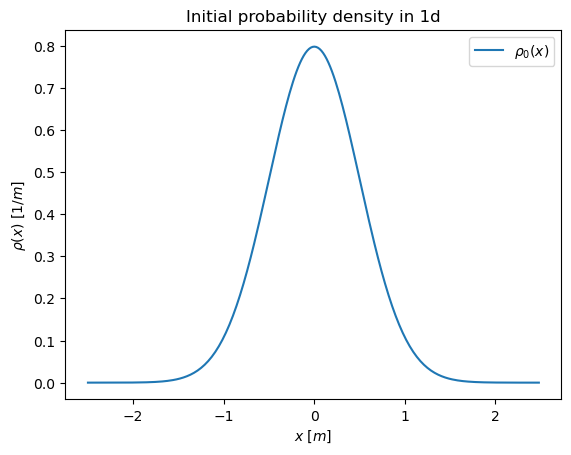

In [16]:
### define initial vector for the density (various options)
#linear spaced arrays of the domain for applying functions
dev = 0.05

#v = np.random.uniform(low=1 - dev, high=1 +  dev, size=x_nodes)

#v = np.ones(x_nodes, dtype=np.float64)

v = norm.pdf(X, 0, 0.5)

#v = norm.pdf(X, loc=-1.25, scale=0.6) + norm.pdf(x, loc=1.25, scale=0.6)

#v = vonmises.pdf(X, loc=0, kappa=4.5)

#v = vonmises.pdf(X, loc=-1.25, kappa=3) + vonmises.pdf(x, loc=1.25, kappa=3)

#v = voigt_profile(X, 0.2, 0.2)

#v = cauchy.pdf(X, loc=0, scale=0.6) #critical sigma = 0.765

#v = function_morse(X)

#v = sech_fit(x, 0.2, 2.5, 0, 0)

#v = u_store_fp[:, vmax_x-4000]

u_init = norm_array(v, dx)
u_d2 = df_dx2(u_init, dx)


fig, ax = plt.subplots()
ax.plot(X, u_init, label= r'$\rho_0(x)$')
#ax.plot(X, u_d2, label= r'$\partial_x^2 \rho_0(x)$')
#ax.set_ylim(ymin=0, ymax=1)
ax.set_xlabel(r'$x$ $[m]$')
ax.set_ylabel(r'$\rho(x)$ $[1/m]$')
ax.legend()
ax.set_title('Initial probability density in 1d')
plt.savefig(plot_dir + 'Init_PDF_1d.pdf')
plt.show()

/home/freddy/Dokumente/work/Studium/Masterarbeit/Paper/Code_Paper/potential.py:175: RuntimeWarning: invalid value encountered in divide
  force = ((-c_a*np.sinh((np.abs(dist)-L/2)/l_a)*dist)/(l_a*np.sinh(L/(2*l_a))*np.abs(dist))) + ((c_r*np.sinh((np.abs(dist)-L/2)/l_r)*dist)/(l_r*np.sinh(L/(2*l_r))*np.abs(dist)))
/home/freddy/Dokumente/work/Studium/Masterarbeit/Paper/Code_Paper/modules/free_energy_calc.py:90: RuntimeWarning: divide by zero encountered in log
  log_dens = np.log(cur_dens)
/home/freddy/Dokumente/work/Studium/Masterarbeit/Paper/Code_Paper/modules/free_energy_calc.py:92: RuntimeWarning: invalid value encountered in multiply
  entropy_energy[i] = 0.5*sigma**2 * dx * np.sum(cur_dens*log_dens)


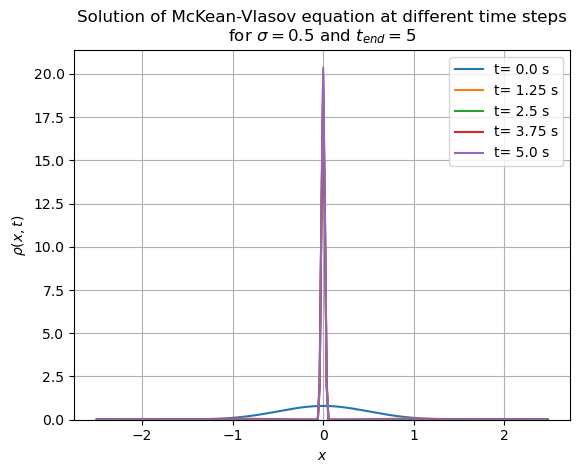

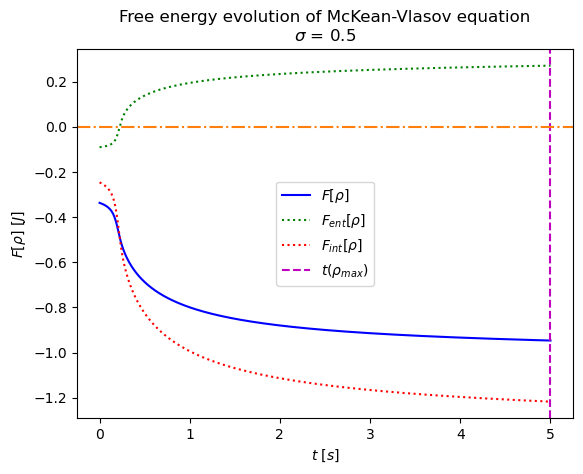

0

In [17]:
t_end = 5
sigma=0.5

u_store_fp, vmax_time, vmax, vmax_idx, u_max, u_end = model_simulation(u_init, sigma=sigma, t_end=t_end, c_a=c_a, l_a=l_a, c_r=c_r, l_r=l_r)
free_energy, entropy, interaction = calc_free_energy(u_store_fp, sigma=sigma)

t_nodes = u_store_fp.shape[1]
t, dt = np.linspace(0, t_end, t_nodes, endpoint=True, retstep=True)
values_init = np.zeros(t_nodes)
values_end = np.zeros(t_nodes)
values_max = np.zeros(t_nodes)
values_iter = np.zeros(t_nodes)

for t_idx in range(t_nodes-1):
    values_init[t_idx] = wasserstein_1(u_store_fp[:,t_idx], u_init)
    values_end[t_idx] = wasserstein_1(u_store_fp[:,t_idx], u_end)
    values_max[t_idx] = wasserstein_1(u_store_fp[:,t_idx], u_max)
    #values_iter[t_idx] = wasserstein_1(u_store_fp[:,t_idx], u_store_fp[:,t_idx-1])
derivative_init = df_dt_1d(values_init, dt)

plot_density_evolution(u_store_fp, sigma=sigma, t_end = t_end, num_curves=4, saving=False)
plot_free_energy_without_derivative(free_energy, entropy, interaction, vmax_time, sigma=sigma, t_end=t_end, plot=True, saving=False)

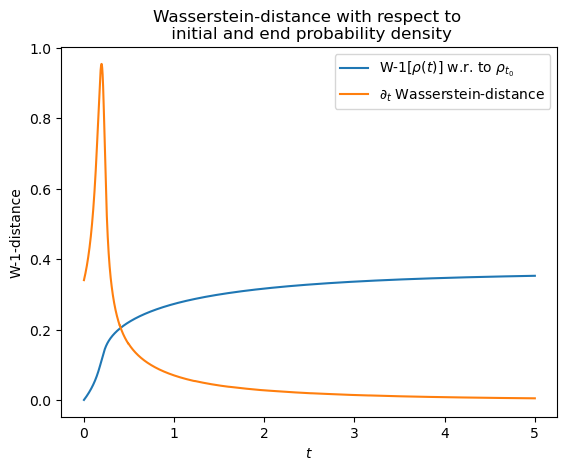

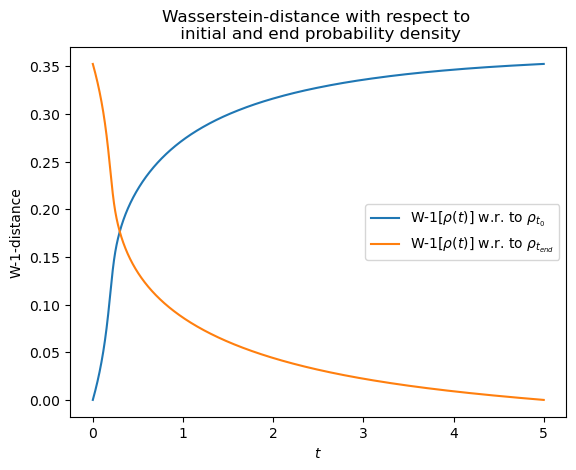

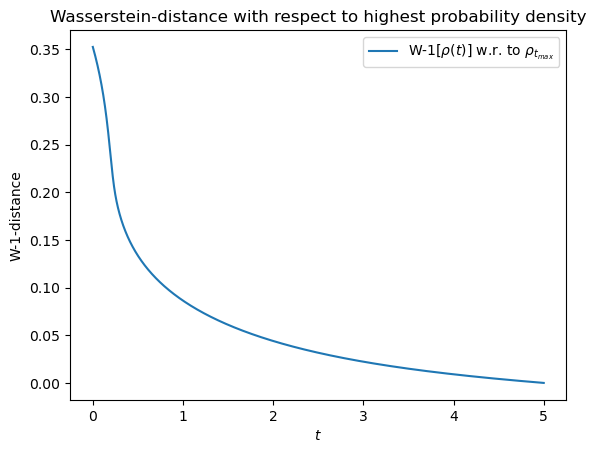

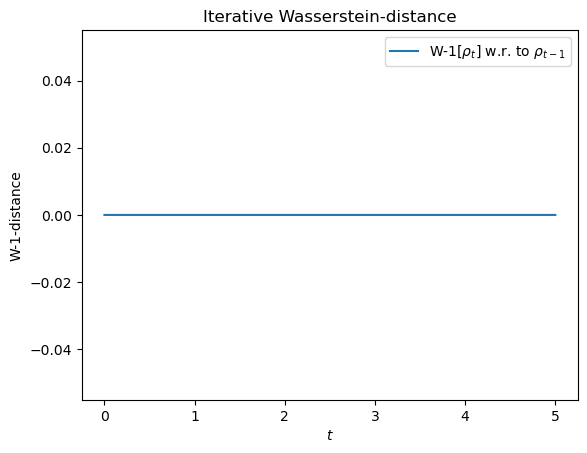

In [10]:
fig, ax = plt.subplots()
ax.plot(t[1:-1], values_init[1:-1], label=r'W-1$[\rho(t)]$ w.r. to $\rho_{t_0}$')
ax.plot(t[1:-2], derivative_init[1:-2], label=r'$\partial_t$ ' + 'Wasserstein-distance')
#ax.axvline(x=max_dt_time, color='k', linestyle='--', label=r'turning point in W-1')
#ax.axvline(x=vmax_time, color='m', linestyle='-.', label=r'$t(\rho_{max})$')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'W-1-distance')
ax.set_title('Wasserstein-distance with respect to \n initial and end probability density')
ax.legend()
plt.savefig(plot_dir + 'WD_begin_derivative_clustering.pdf')
plt.show()

fig, ax = plt.subplots()
ax.plot(t[1:-1], values_init[1:-1], label=r'W-1$[\rho(t)]$ w.r. to $\rho_{t_0}$')
ax.plot(t[1:-1], values_end[1:-1], label=r'W-1$[\rho(t)]$ w.r. to $\rho_{t_{end}}$')
#ax.axvline(x=max_dt_time, color='k', linestyle='--', label=r'turning point in W-1')
#ax.axvline(x=vmax_time, color='m', linestyle='-.', label=r'$t(\rho_{max})$')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'W-1-distance')
ax.set_title('Wasserstein-distance with respect to \n initial and end probability density')
ax.legend()
plt.savefig(plot_dir + 'WD_begin_end_clustering.pdf')
plt.show()

fig, ax = plt.subplots()
ax.plot(t[1:-1], values_max[1:-1], label=r'W-1$[\rho(t)]$ w.r. to $\rho_{t_{max}}$')
#ax.axvline(x=vmax_time, color='m', linestyle='-.', label=r'$t(\rho_{max})$')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'W-1-distance')
ax.set_title('Wasserstein-distance with respect to highest probability density')
ax.legend()
plt.savefig(plot_dir + 'WD_max_clustering.pdf')
plt.show()


fig, ax = plt.subplots()
ax.plot(t[1:-1], values_iter[1:-1], label=r'W-1$[\rho_t]$ w.r. to $\rho_{t-1}$')
#ax.plot(t[2:-2], derivative_iter[2:-2], label=r'$\partial_t$ ' + 'Wasserstein-distance')
#ax.axvline(x=turn_point_time, color='k', linestyle='--', label=r'turning point in $F[\rho]$')
#ax.axvline(x=vmax_time, color='m', linestyle='-.', label=r'$t(\rho_{max})$')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'W-1-distance')
ax.set_title('Iterative Wasserstein-distance')
ax.legend()
plt.savefig(plot_dir + 'WD_iterative_clustering.pdf')
plt.show()